**The PaySim synthetic financial datasets for fraud detection provide a good basis for exploring what can be done with transactional financial data. We use this set here to walkthrough a standard analysis around a classification problem using structured data and discuss approach, results and improvements.** (https://www.kaggle.com/datasets/ealaxi/paysim1)

To download the dataset from kaggle, we use the package kagglehub and then read the data into a pandas dataframe. We check the top rows to see that the data has loaded successfully.

In [1]:
import kagglehub
import pandas as pd

# Download latest version of paysim synthetic fraud dataset
path = kagglehub.dataset_download("ealaxi/paysim1")

df_all = pd.read_csv(path + "/PS_20174392719_1491204439457_log.csv")
print(df_all.head())

print(f"Shape of dataframe: {df_all.shape}")

/home/jesco/Repos/fin_trans/.fin_trans/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  
Shape of dataframe: (6362620, 11)


*For performance reasons we limit the actions taken in this notebook to around 100'000 rows. We will filter up to the step when this number of rows is reached.*

In [3]:
step_limit = df_all['step'].values[99999]
df = df_all[df_all['step'] <= step_limit].copy()
print(f"Shape of dataframe: {df.shape}")

Shape of dataframe: (108717, 11)


1. Explorative Data Analysis: As a first step we check distributions, missing values, frequencies and correlations in order to both understand the data but also to recognize first patterns.

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
------------------


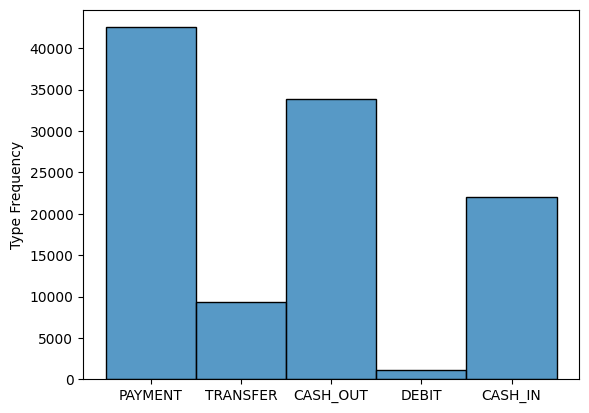

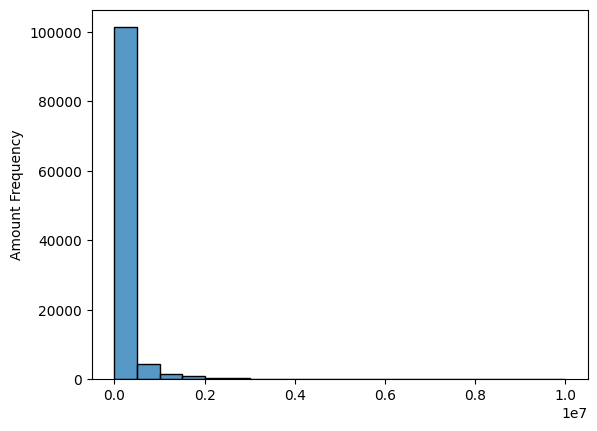

nameDest
C985934102     78
C1286084959    73
C248609774     72
C1590550415    71
C2083562754    68
C977993101     67
C665576141     66
C1360767589    63
C451111351     60
C97730845      58
Name: count, dtype: int64

isFraud
0    108597
1       120
Name: count, dtype: int64


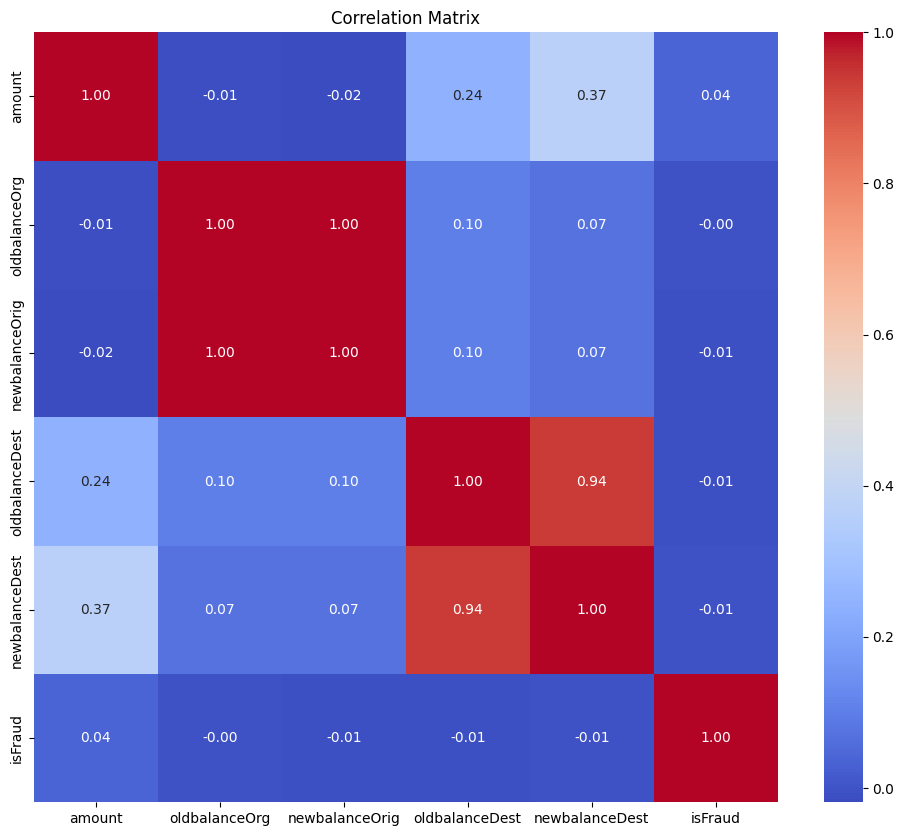

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Missing values
print(df.isnull().sum())
print("------------------")

# Histograms for type and amount
sns.histplot(df['type'].values)
plt.ylabel('Type Frequency')
plt.show()

sns.histplot(df['amount'].values, bins=20)
plt.ylabel('Amount Frequency')
plt.show()

# Frequency tables for nameDest and isFraud
top10_nameDest = df['nameDest'].value_counts().head(10)
print(top10_nameDest)
print()
print(df['isFraud'].value_counts())

# Correlation Matrix
selected_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']
subset_df = df.loc[:,selected_cols]
corr_matrix = subset_df.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


*There is no missing data. Most transactions are payments. There is a certain concentration on a few recipients and it seems there is a minimal indication that higher amounts could correlate to possible fraud.*